In [11]:
!pip install shap
!pip install streamlit



First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0

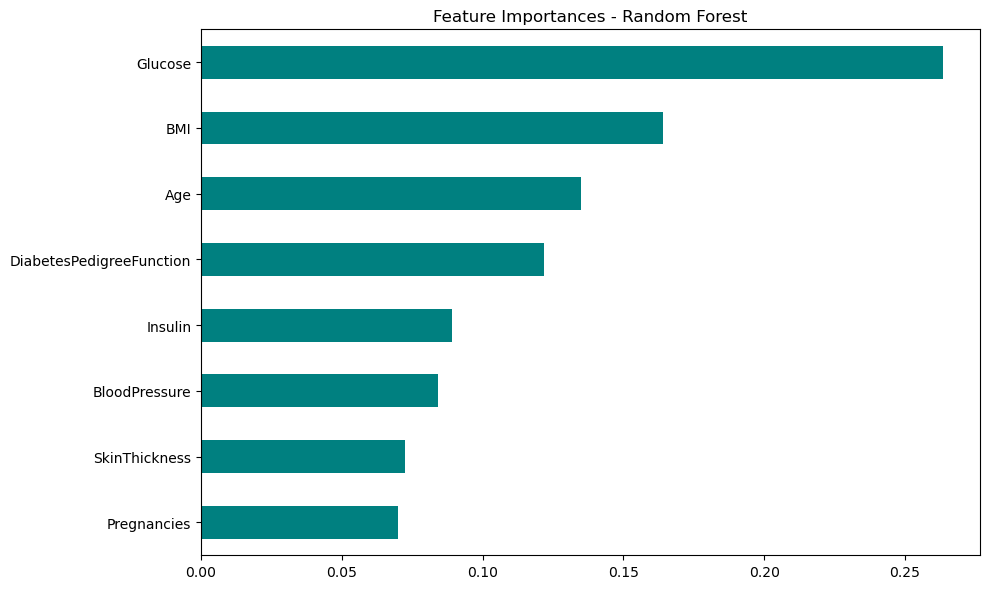

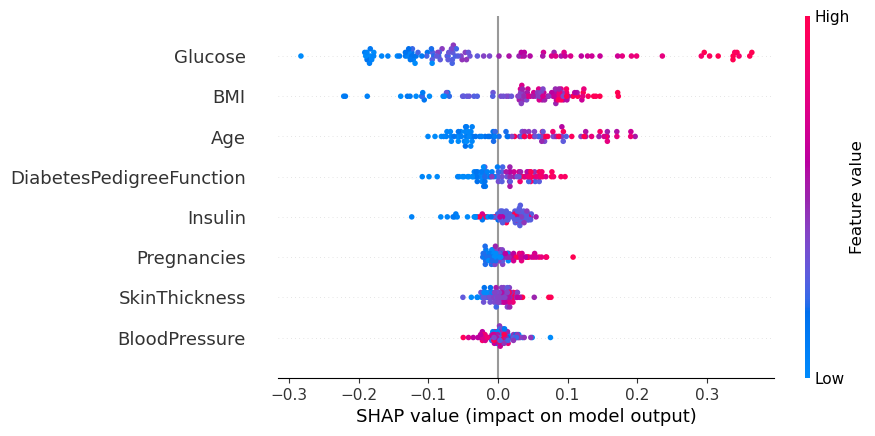

['scaler.pkl']

In [17]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Load the dataset
df = pd.read_csv('diabetes.csv') 
print("First 5 rows:\n", df.head())

# 3. Replace zero values with NaN for specific columns
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# 4. Impute missing values with median
df.fillna(df.median(), inplace=True)

# 5. Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# 9. Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# 10. Evaluation
print("\nLogistic Regression Report:\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

print("\nRandom Forest Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# 11. Feature Importance Plot (Random Forest)
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

# 12. SHAP Explainability (Fixed for classification)
explainer = shap.Explainer(rf_model, X_train_scaled, feature_names=X.columns)
shap_values_all = explainer(X_test_scaled[:100], check_additivity=False)

# For binary classification, shap_values_all[i] gives class i (0 or 1)
# Use class 1 for diabetic prediction
shap_values = shap_values_all[:, :, 1]  

# 13. SHAP Beeswarm Plot
shap.plots.beeswarm(shap_values)
import joblib

# Save trained Random Forest model
joblib.dump(rf_model, 'diabetes_model.pkl')

# Save the scaler used to normalize inputs
joblib.dump(scaler, 'scaler.pkl')



In [19]:
import streamlit as st
import numpy as np
import joblib

# Load model and scaler
model = joblib.load('diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')

# Streamlit UI
st.title("🩺 Diabetes Risk Prediction")
st.write("Enter the following medical details:")

# Input fields
pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
glucose = st.number_input("Glucose", min_value=0, max_value=200, value=100)
bp = st.number_input("Blood Pressure", min_value=0, max_value=150, value=70)
skin = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
insulin = st.number_input("Insulin", min_value=0, max_value=900, value=80)
bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5)
age = st.number_input("Age", min_value=0, max_value=120, value=30)

# Predict
if st.button("Predict"):
    user_input = np.array([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]])
    user_input_scaled = scaler.transform(user_input)
    prediction = model.predict(user_input_scaled)

    if prediction[0] == 1:
        st.error("⚠️ High Risk of Diabetes")
    else:
        st.success("✅ Low Risk of Diabetes")


2025-07-29 00:25:57.251 
  command:

    streamlit run C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [21]:
import os
os.getcwd()



'C:\\Users\\DELL'